In [2]:
%pip install numpy pandas matplotlib



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\lucas784\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv("wcs.csv", delimiter=";")
df.columns = ["time", "ms", "channel", "data"] 


df


,time,ms,channel,data
0,14:37:00,8,800902,00 1D 20 EF BF BD 4D 20 20 00 00 20 20 C3 98 2...
1,14:37:00,9,801602,00 1D 20 EF BF BD EF BF BD 20 20 00 00 20 20 6...
2,14:37:00,23,801102,00 1D 20 66 21 20 20 00 00 20 20 0E 3A 20 20 6...
3,14:37:00,85,801102,00 1D 20 EF BF BD 52 20 20 00 00 20 20 18 EF B...
4,14:37:00,86,800402,00 1D 20 EF BF BD EF BF BD 20 20 00 00 20 20 E...
...,...,...,...,...
3306,14:38:00,980,800702,00 1D 20 68 EF BF BD 20 20 00 00 20 20 00 67 2...
3307,14:38:00,990,801702,00 1D 20 07 4C 20 20 00 00 20 20 1C EF BF BD 2...
3308,14:38:00,992,800502,00 1D 20 15 08 20 20 00 00 20 20 EF BF BD 6F 2...
3309,14:38:00,995,801202,00 1D 20 EF BF BD 5C 20 20 00 00 20 20 EF BF B...


In [3]:
numeric_indices = df.index
time_values = df.time + '.' + df.ms.astype(str) # Format as hours and minutes
time_values

0         14:37:00.8
1         14:37:00.9
2        14:37:00.23
3        14:37:00.85
4        14:37:00.86
            ...     
3306    14:38:00.980
3307    14:38:00.990
3308    14:38:00.992
3309    14:38:00.995
3310     14:38:01.64
Length: 3311, dtype: object

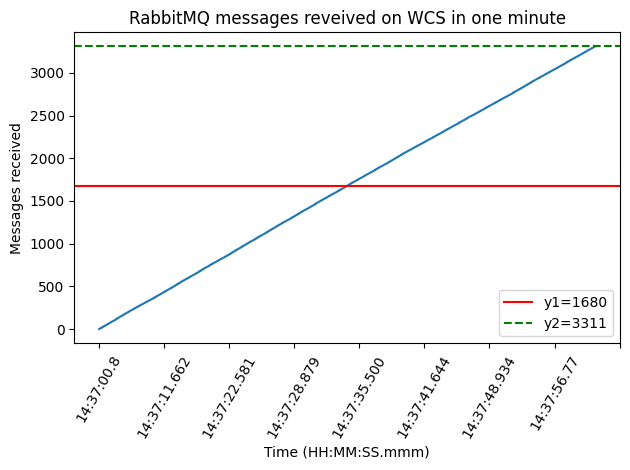

In [4]:
 

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # Adjust `nbins` to control the number of labels
plt.plot(time_values, numeric_indices)
plt.ylabel('Messages received')
plt.xlabel('Time (HH:MM:SS.mmm)')
plt.title('RabbitMQ messages reveived on WCS in one minute')
plt.axhline(1680, color='red', label='y1=1680')  # Horizontal line at 1680
plt.axhline(time_values.size, color='green', linestyle='--', label=f'y2={time_values.size}')  # Horizontal line at 1680
plt.xticks(rotation=60)
plt.legend() 
plt.tight_layout()
plt.show()